In [1]:
#!pip install geopandas

### Task:

On our first session we reproduced famous Gapminder plot. Well, at least part of this plot (you can find my code here). Now you have to add more data and some interactivity to it.

1. Whenever you mouseover / hover on some country on the chart, you should be able to see other countries that belong to the same continent highlighted (so other countries should have less opacity). - Done

2. You should have slider under the chart and be able to filter the year with it (please notice that first we recreated the chart just for one year but now you have to use extended version of this dataset with more years provided). - Done

3. You should add a small side map colored by continent just as original chart does (open the page and click "color" button to see it). This map should work both as a legend and a filter - so whenever you click on some country on the chart, you should be able to see other countries that belong to the same continent highlighted. For this task you might need to use world.geojson. And you probably have to check whether countries/continents are named the same way in the csv and geojson.

In [67]:
# import libraries
import altair as alt
import requests
import pandas as pd
import geopandas as gpd
import json

# it just needs to be here so we can work with big files 
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [68]:
# Try plotting maps in 

# uploading geojson
path = 'https://github.com/trokhymovych/data-viz-UCU2019/blob/master/HW4/data/world.geojson'
with open("data/world.geojson") as f:
    data_geo = json.load(f)
gdf = gpd.GeoDataFrame.from_features((data_geo))

# converting 'Oceania' into 'Asia' for consistency
f = lambda x: 'Asia' if x=='Oceania' else x
gdf['region_un'] = gdf['region_un'].map(f)

# gdf.rename(columns={"region_un": "continent"}, inplace = True)

path2 = 'https://github.com/trokhymovych/data-viz-UCU2019/raw/master/HW4/data/gapminder.csv'
df = pd.read_csv(path2)

## Continents geojson

In [6]:
path = 'https://gist.github.com/hrbrmstr/91ea5cc9474286c72838/raw/59421ff9b268ff0929b051ddafafbeb94a4c1910/continents.json'
geo_data = gpd.GeoDataFrame.from_file((path))
geo_data.columns = ['continent','geometry']

gdf = gpd.GeoDataFrame(geo_data)
gdf = gdf[:7]
gdf.continent = ['Asia', 'Americas', 'Europe', 'Africa', 'Americas', 'Asia', 'Asia']

gdf.columns

# Let's plot it!

In [69]:
# CONVERT GEOPANDAS DATAFRAME BACK TO GEOJSON
choro_json = json.loads(gdf.to_json())
choro_data = alt.Data(values=choro_json['features'])

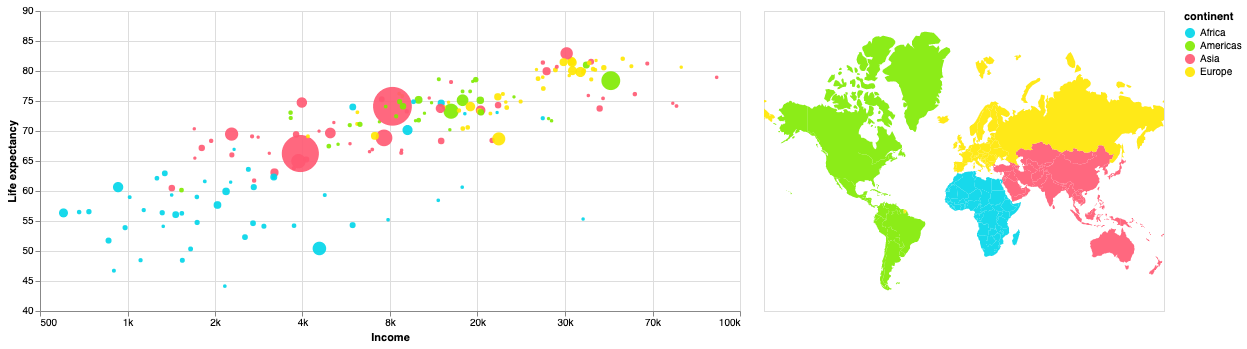

In [71]:
# configure axis and view
single_selection_1 = alt.selection_single(fields = ['continent'], on='mouseover')
single_selection_2 = alt.selection_single(fields = ['continent'])

slider = alt.binding_range(min=2009, max=2017, step=1, name='Year:  ', )
slider_selection = alt.selection_single(name="year_selector", fields=['year'],bind=slider, init={'year': 2009}, )


mapp = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='transparent'
).encode(
    color = alt.Color('continent:N', 
              scale=alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"]),
              title = "DC Population", legend = None),
    opacity = alt.condition(single_selection_2, alt.value(0.9), alt.value(0.25))
).add_selection(single_selection_2).transform_calculate(continent = 'datum.properties.region_un')

chart = alt.Chart(df).mark_circle().encode(
    x = alt.X('gdpPerCap:Q', 
              title = 'Income',
              scale = alt.Scale(type = 'log', base = 2),
              axis = alt.Axis(format = '.1s')),
    y = alt.Y('lifeExp:Q', 
              title = 'Life expectancy',
              scale = alt.Scale(zero = False, domain = [40,90])),
    color = alt.Color('continent:N', 
                      title = 'continent',
                      scale = alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"])),
    size = alt.Size('pop:Q', 
                    title = 'population',
                    scale = alt.Scale(range = [10, 1500]),
                    legend = None),
    opacity = alt.condition(single_selection_1, alt.value(0.9), alt.value(0.25)),
).add_selection(single_selection_1
).transform_filter(single_selection_2
).add_selection(slider_selection
).transform_filter(slider_selection).properties(width = 700, height = 300)

alt.hconcat(chart, mapp)

In [290]:
# configure axis and view
single_selection_1 = alt.selection_single(fields = ['continent'], on='mouseover')
single_selection_2 = alt.selection_single(fields = ['continent'])

slider = alt.binding_range(min=2009, max=2017, step=1, name='Year:  ', )
slider_selection = alt.selection_single(name="year_selector", fields=['year'],bind=slider, init={'year': 2009}, )

mapp = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='transparent'
).encode(
    color = alt.Color('continent:N', 
              scale=alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"]),
              title = "DC Population", legend = None),
    opacity = alt.condition(single_selection_2, alt.value(0.9), alt.value(0.25))
).add_selection(single_selection_2).transform_calculate(continent = 'properties.region_un')

chart = alt.Chart(df).mark_circle().encode(
    x = alt.X('gdpPerCap:Q', 
              title = 'Income',
              scale = alt.Scale(type = 'log', base = 2),
              axis = alt.Axis(format = '.1s')),
    y = alt.Y('lifeExp:Q', 
              title = 'Life expectancy',
              scale = alt.Scale(zero = False, domain = [40,90])),
    color = alt.Color('continent:N', 
                      title = 'continent',
                      scale = alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"])),
    size = alt.Size('pop:Q', 
                    title = 'population',
                    scale = alt.Scale(range = [10, 1500]),
                    legend = None),
    opacity = alt.condition(single_selection_1, alt.value(0.9), alt.value(0.25))
).add_selection(single_selection_1
).transform_filter(single_selection_2
).add_selection(slider_selection
).transform_filter(slider_selection).properties(width = 700, height = 300)



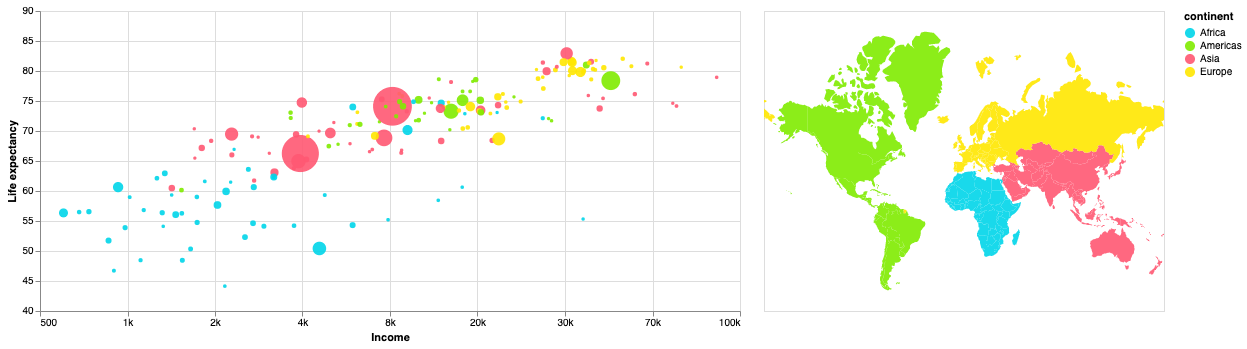

In [301]:
# configure axis and view
single_selection_1 = alt.selection_single(fields = ['continent'], on='mouseover')
single_selection_2 = alt.selection_single(fields = ['continent'])

slider = alt.binding_range(min=2009, max=2017, step=1, name='Year:  ', )
slider_selection = alt.selection_single(name="year_selector", fields=['year'],bind=slider, init={'year': 2009}, )

mapp = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='transparent'
).encode(
    color = alt.Color('continent:N', 
              scale=alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"]),
              title = "DC Population", legend = None),
    opacity = alt.condition(single_selection_2, alt.value(0.9), alt.value(0.25))
).add_selection(single_selection_2).transform_calculate(continent = 'datum.properties.region_un')

chart = alt.Chart(df).mark_circle().encode(
    x = alt.X('gdpPerCap:Q', 
              title = 'Income',
              scale = alt.Scale(type = 'log', base = 2),
              axis = alt.Axis(format = '.1s')),
    y = alt.Y('lifeExp:Q', 
              title = 'Life expectancy',
              scale = alt.Scale(zero = False, domain = [40,90])),
    color = alt.Color('continent:N', 
                      title = 'continent',
                      scale = alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"])),
    size = alt.Size('pop:Q', 
                    title = 'population',
                    scale = alt.Scale(range = [10, 1500]),
                    legend = None),
    opacity = alt.condition(single_selection_1, alt.value(0.9), alt.value(0.25))
).add_selection(single_selection_1
).transform_filter(single_selection_2
).add_selection(slider_selection
).transform_filter(slider_selection).properties(width = 700, height = 300)

alt.hconcat(chart, mapp)